<a href="https://colab.research.google.com/github/bankros/OPTIMIZACI-N-1/blob/main/proyecto_de_programaci%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización
## Problema de optimización lineal 
### Trabajo presentado por: Kevin Rincón Ortiz
### Profesor: Miguel  Vargas
### Universidad del Valle

# Paquetes
Aca vamos a importaremos todos los paquetes que vamos a utilizar 

In [2]:
!pip install PuLP

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pulp

# Problema
La Ecopetrol produce dos tipos de gasolina sin plomo, regular y extra los cuales vende a  estaciones de servicio en 12 y 16 dolares por barril,respectivamente.

Ambos tipos se preparan del inventario de ecopretrol del petróleo nacional refinado y de petróleo importado refinado, y deben cumplir con las siguientes especificaciones:

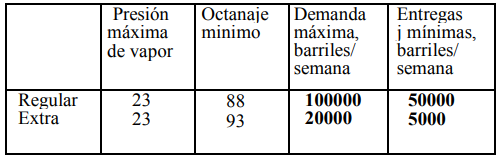

Las caracteristicas del inventario de petróleos refinandos la siguiente:

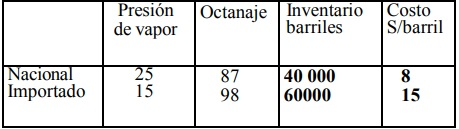 

¿Qué cantidades de los dos petróleos nacionales e importados deberán mezclar ecopetrol en ambas gasolinas, a fin de maximizar la ganancia semanal?

# Planteamiento del problema
**variables**: 

$X_1=$ barriles de petroleo nacional mezclado en la regular.

$X_2=$ barriles de petróleo importado mezclado en la regular. 

$X_3=$ barriles de petróleo nacional mezclado en la extra. 

$X_4=$ barriles de petróleo importado mezclado en la extra.

**condiciones**

Se producirá una cantidad $X_1 + X_2$ de gasolina regular y generará un ingreso de $12(X_1 + X_2)$, se producirá una cantidad $X_3 + X_4$ de extra y generará un ingreso de $16(X_1 + X_2)$. 

Se usará una cantidad $X_1 + X_3$ de petróleo nacional, a un costo de $8(X_1 + X_3)$; se usará una cantidad $X_2 + X_4$ de importado, a un costo de $15(X_1 + X_3)$.
La ganancia total, denota por "GT", es el ingreso menos el costo: 
maximizando:
 (1)$GT= 12(X_1 + X_2)+16(X_3 + X_4) -8(X_1 + X_3)-15(X_2 + X_4)= 
4X_1-3X_2 + 8X_3+ X_4$ 

**Restricciones**
Hay limitaciones impuestas a la producción por la demanda, la disponibilidad de suministros y las especificaciones de la mezcla. Se tiene de las demandas: 

(2)$X_1 + X_2 \leq 100 000$ demanda máxima de regular 

(3)$X_3 + X_4 \leq 20000$ demanda máxima de extra

(4)$X_1 + X_2 \geq 50000$ requerimiento mínimo regular

(5)$X_3 + X_4 \geq 5000$ requerimiento mínimo de extra

*Disponibilidad*

(6)$X_1 + X_3 \geq 40000$ nacional

(7)$X_2 + X_4 \geq 60000$ importado

Los componentes de una mezcla contribuyen al octanaje general, según sus porcentajes por peso; asimismo para la presión de vapor. Entonces, el octanaje de la regular es:

$87\frac{X_1}{X_1+X_2} + 98 \frac{X_2}{X_1+X_2}$

y el requerimiento de que éste sea de por lo menos 88, lleva a: 

(8)$X_1 – 10X_2 \leq 0$

Igualmente, se obtiene: 

 (9) $6X_3 – 5X_4 \leq 0$ restricción de octanaje de la extra.

 (10)$2X_1- 8X_2 \leq 0$ restricción de presión de vapor regular.

 (11)$2X_3-8X_4 \leq 0$ restricción depresión de vapor extra.

 (12) $X_1,X_2,X_3,X_4 \geq 0$ no negatividad.




# Función objetivo
Como queremos maximizar la ganancia semanal de la gasolinera.
$$GT=4X_1-3X_2 + 8X_3+ X_4$$
pero como queremos maximizar, entonces por la teoría sabes que es equivalente lo siguiente: minimizar $-GT$ que en este caso es una función a maximizar.

In [99]:
# Definimos la lista de los diferentes del petroleo
Gasolina = ['barriles de petróleo nacional mezclado en la regular', 'barriles de petróleo importado mezclado en la regular', 'barriles de petróleo nacional mezclado en la extra', 'barriles de petróleo importado mezclado en la extra']

# Definimos la lista de valiables X_Ingrediente
variables = pulp.LpVariable.dicts("X",Gasolina,0)

In [98]:
x1=pulp.LpVariable("barriles de petróleo nacional mezclado en la regula", 0)
x2=pulp.LpVariable("barriles de petróleo importado mezclado en la regula", 0)
x3=pulp.LpVariable("barriles de petróleo nacional mezclado en la extra", 0)
x4=pulp.LpVariable("barriles de petróleo importado mezclado en la extra", 0)

In [97]:
# ponemos el problema y ademas agregamos a este la función objetivo -f(x)
probl = pulp.LpProblem("Problema_Gasolineria", pulp.LpMinimize)
probl += -(4*x1-3*x2+8*x3+x4)
probl

Problema_Gasolineria:
MINIMIZE
-1*barriles_de_petróleo_importado_mezclado_en_la_extra + 3*barriles_de_petróleo_importado_mezclado_en_la_regula + -8*barriles_de_petróleo_nacional_mezclado_en_la_extra + -4*barriles_de_petróleo_nacional_mezclado_en_la_regula + 0
VARIABLES
barriles_de_petróleo_importado_mezclado_en_la_extra Continuous
barriles_de_petróleo_importado_mezclado_en_la_regula Continuous
barriles_de_petróleo_nacional_mezclado_en_la_extra Continuous
barriles_de_petróleo_nacional_mezclado_en_la_regula Continuous

programemos cada restricción para eso utilizaremos los diccionarios definidos anteriormente 

In [100]:
probl += x1 + x2 <=100000, "R_demanda_maxima_de_regular"


In [77]:
probl += x3 + x4 <=20000, "R_demanda_maxima_de_extra"


In [81]:
probl += x1 + x2 >=50000, "R_requerimiento_minimo_de_regular"


In [75]:
probl += x3 + x4 >=5000, "R_requerimiento_minimo_de_regular"


In [74]:
probl += x1 + x3 >=40000, "R_nacional"


In [73]:
probl += x2 + x4 >=60000, "R_importado"


In [72]:
probl += x1 - 10*x2 <=0, "R_restriccion de octanaje regular"


In [71]:
probl += 6*x3 - 8*x4 <=0, "R_restriccion de octanaje extra"


In [70]:
probl += 2*x1 - 8*x2 <=0, "R_restriccion de vapor regular"


In [69]:
probl += 2*x3 - 8*x4 <=0, "R_restriccion de vapor extra"


In [82]:
probl.writeLP("Problema_Gasolineria.lp")

[barriles_de_petróleo_importado_mezclado_en_la_extra,
 barriles_de_petróleo_importado_mezclado_en_la_regula,
 barriles_de_petróleo_nacional_mezclado_en_la_extra,
 barriles_de_petróleo_nacional_mezclado_en_la_regula]

# Solucion del problema


In [95]:
#utilizando pulp.solve sabemos la solucion de nuestro problema
probl.solve()
print ('==========================================================')
print ('||               **SOLUCIÓN DEL PROBLEMA**              ||')
print ('==========================================================')
print("||  El estaus final de la solución es:", pulp.LpStatus[probl.status],'         ||')
print("||  El valor de la función objetivo es:", pulp.value(probl.objective),'    ||')
print ('==========================================================')
print("||                 Reporte de variables                 ||")
print ('==========================================================')
print('|| ',x1, "=" , pulp.value(x1), '                    ||')
print('|| ',x2, "=" , pulp.value(x2), '                    ||')
print('|| ',x3, "=" , pulp.value(x3), '                    ||')
print('|| ',x4, "=" , pulp.value(x4), '                    ||')
print ('==========================================================')

||               **SOLUCIÓN DEL PROBLEMA**              ||
||  El estaus final de la solución es: Unbounded          ||
||  El valor de la función objetivo es: 0.0     ||
||                 Reporte de variables                 ||
||  barriles_de_petróleo_nacional_mezclado_en_la_regula = 0.0                     ||
||  barriles_de_petróleo_importado_mezclado_en_la_regula = 0.0                     ||
||  barriles_de_petróleo_nacional_mezclado_en_la_extra = 0.0                     ||
||  barriles_de_petróleo_importado_mezclado_en_la_extra = 0.0                     ||


# Conclusiones
Al resolver el problema llegamos que es inconsistente, lo cual no permite decir que al hacer un problema con datos al azar es muy problable que nos ocurra eso ya que sin mayor certeza de nuestro bases no podemos optimizar correctamente.

Del problema podemos evidenciar la eficacia de la solución ya que nos dice que no es posible tener ganancias semanales con dichas restricciones que tomamos, es decir por el -2 de la solución solo llegamos a perdidas semanales incumpliendo nuestro objetivo de maximizar nuestra ganancias.

# referencias
1. Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.
2. Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.
3. Miguel Vargas(2021). Aspectos teoricos de pl